In [114]:
import pandas as pd
import sklearn as skl
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt 
%matplotlib inline

In [115]:
nf= pd.read_csv('netflix_titles.csv')

In [116]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [117]:
nf.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [118]:
nf_clean = nf.copy()

In [119]:
nf_clean= nf_clean.drop(['director','cast'], axis=1)

In [120]:
nf_clean.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [121]:
nf_clean=nf_clean.dropna(axis=0, how='any')

In [122]:
nf_clean.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [123]:
nf_clean.date_added= pd.to_datetime(nf_clean.date_added)

In [124]:
nf_clean.date_added.dtypes

dtype('<M8[ns]')

In [125]:
nf_clean.show_id = nf_clean.show_id.astype(str)

In [126]:
nf_clean.show_id.dtypes

dtype('O')

In [127]:
nf_clean['country'].unique()

array(['United States, India, South Korea, China', 'United Kingdom',
       'United States', 'Spain', 'Bulgaria, United States, Spain, Canada',
       'Chile', 'United States, United Kingdom, Denmark, Sweden',
       'Netherlands, Belgium, United Kingdom, United States',
       'France, Belgium', 'United States, Uruguay', 'United States,',
       'Thailand', 'China, Canada, United States',
       'Belgium, United Kingdom, United States', 'Belgium, France',
       'India', 'France', 'United States, Canada', 'Pakistan', 'Canada',
       'United Kingdom, France', 'United States, United Kingdom',
       'South Korea', 'Denmark, United States',
       'United Kingdom, United States', 'Turkey, United States', 'Brazil',
       'Denmark, France, Italy, Belgium, Netherlands', 'Indonesia',
       'China', 'Ireland, United Kingdom', 'Turkey', 'Hong Kong',
       'France, Morocco', 'Hong Kong, China', 'Mexico',
       'United States, Mexico', 'Vietnam', 'France, Canada',
       'Spain, Argentina',

In [128]:
nf_clean['main_country'] = nf_clean['country'].apply(lambda x: x.split(",")[0])

In [129]:
nf_clean=nf_clean.drop('country', axis=1)

In [130]:
nf_clean

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,main_country
0,81145628,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,United States
1,80117401,Movie,Jandino: Whatever it Takes,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,United Kingdom
2,70234439,TV Show,Transformers Prime,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",United States
3,80058654,TV Show,Transformers: Robots in Disguise,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,United States
4,80125979,Movie,#realityhigh,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,United States
...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,2019-04-10,2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...,Cyprus
6219,80186475,TV Show,Pokémon the Series,2019-04-01,2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...,Japan
6220,70272742,TV Show,Justin Time,2016-04-01,2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien...",Canada
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,2016-04-01,2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...,Japan


In [131]:
nf_clean['listed_in'].unique()

array(['Children & Family Movies, Comedies', 'Stand-Up Comedy',
       "Kids' TV", 'Comedies',
       'Crime TV Shows, International TV Shows, Spanish-Language TV Shows',
       'International Movies, Sci-Fi & Fantasy, Thrillers',
       'Docuseries, Science & Nature TV', 'Action & Adventure, Thrillers',
       'Action & Adventure, Dramas, International Movies',
       'Cult Movies, Dramas, Independent Movies',
       'Comedies, Independent Movies, Romantic Movies',
       'Action & Adventure, Comedies, International Movies',
       'Documentaries', 'Horror Movies, Thrillers',
       'Dramas, Independent Movies',
       'Dramas, Independent Movies, Romantic Movies',
       'Horror Movies, International Movies',
       'Children & Family Movies, Comedies, Sci-Fi & Fantasy',
       'Comedies, Romantic Movies',
       'Dramas, International Movies, Thrillers',
       'Dramas, Independent Movies, International Movies',
       'Comedies, International Movies',
       'International TV Shows

In [132]:
nf_clean['genre'] = nf_clean['listed_in'].apply(lambda x: x.split(",")[0])

In [133]:
nf_clean=nf_clean.drop('listed_in', axis=1)

In [134]:
nf_clean

,show_id,type,title,date_added,release_year,rating,duration,description,main_country,genre
0,81145628,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019,TV-PG,90 min,Before planning an awesome wedding for his gra...,United States,Children & Family Movies
1,80117401,Movie,Jandino: Whatever it Takes,2016-09-09,2016,TV-MA,94 min,Jandino Asporaat riffs on the challenges of ra...,United Kingdom,Stand-Up Comedy
2,70234439,TV Show,Transformers Prime,2018-09-08,2013,TV-Y7-FV,1 Season,"With the help of three human allies, the Autob...",United States,Kids' TV
3,80058654,TV Show,Transformers: Robots in Disguise,2018-09-08,2016,TV-Y7,1 Season,When a prison ship crash unleashes hundreds of...,United States,Kids' TV
4,80125979,Movie,#realityhigh,2017-09-08,2017,TV-14,99 min,When nerdy high schooler Dani finally attracts...,United States,Comedies
...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,2019-04-10,2017,TV-G,2 Seasons,Full of funny one-liners and always ready for ...,Cyprus,Kids' TV
6219,80186475,TV Show,Pokémon the Series,2019-04-01,2019,TV-Y7-FV,2 Seasons,Ash and his Pikachu travel to the Alola region...,Japan,Anime Series
6220,70272742,TV Show,Justin Time,2016-04-01,2012,TV-Y,2 Seasons,"In Justin's dreams, he and his imaginary frien...",Canada,Kids' TV
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,2016-04-01,2016,TV-14,2 Seasons,A new set of six men and women start their liv...,Japan,International TV Shows


In [135]:
grouped = nf_clean.groupby(nf_clean.type)
movies = grouped.get_group('Movie')

In [136]:
movies = movies.drop('type', axis=1)

In [137]:
movies

,show_id,title,date_added,release_year,rating,duration,description,main_country,genre
0,81145628,Norm of the North: King Sized Adventure,2019-09-09,2019,TV-PG,90 min,Before planning an awesome wedding for his gra...,United States,Children & Family Movies
1,80117401,Jandino: Whatever it Takes,2016-09-09,2016,TV-MA,94 min,Jandino Asporaat riffs on the challenges of ra...,United Kingdom,Stand-Up Comedy
4,80125979,#realityhigh,2017-09-08,2017,TV-14,99 min,When nerdy high schooler Dani finally attracts...,United States,Comedies
6,70304989,Automata,2017-09-08,2014,R,110 min,"In a dystopian future, an insurance adjuster f...",Bulgaria,International Movies
7,80164077,Fabrizio Copano: Solo pienso en mi,2017-09-08,2017,TV-MA,60 min,Fabrizio Copano takes audience participation t...,Chile,Stand-Up Comedy
...,...,...,...,...,...,...,...,...,...
5575,80093107,Toro,2017-04-01,2016,NR,106 min,Ex-con Toro's brother and former partner in cr...,Spain,Dramas
5577,80085438,Frank and Cindy,2016-04-01,2007,TV-MA,70 min,Frank was a rising pop star when he married Ci...,United States,Documentaries
5578,80085439,Frank and Cindy,2016-04-01,2015,R,102 min,A student filmmaker vengefully turns his camer...,United States,Comedies
5579,80011846,Iverson,2016-04-01,2014,NR,88 min,This unfiltered documentary follows the rocky ...,United States,Documentaries


In [138]:
movies = movies.rename(columns={'duration':'duration_in_mins'})

In [139]:
movies.columns

Index(['show_id', 'title', 'date_added', 'release_year', 'rating',
       'duration_in_mins', 'description', 'main_country', 'genre'],
      dtype='object')

In [140]:
movies['duration_in_mins'] = movies['duration_in_mins'].str.replace('min','',-1)

In [141]:
movies.duration_in_mins

0        90 
1        94 
4        99 
6       110 
7        60 
        ... 
5575    106 
5577     70 
5578    102 
5579     88 
5580    109 
Name: duration_in_mins, Length: 4066, dtype: object

In [142]:
movies.duration_in_mins = movies.duration_in_mins.astype(int)

In [143]:
movies.duration_in_mins.dtypes

dtype('int32')

In [144]:
movies

,show_id,title,date_added,release_year,rating,duration_in_mins,description,main_country,genre
0,81145628,Norm of the North: King Sized Adventure,2019-09-09,2019,TV-PG,90,Before planning an awesome wedding for his gra...,United States,Children & Family Movies
1,80117401,Jandino: Whatever it Takes,2016-09-09,2016,TV-MA,94,Jandino Asporaat riffs on the challenges of ra...,United Kingdom,Stand-Up Comedy
4,80125979,#realityhigh,2017-09-08,2017,TV-14,99,When nerdy high schooler Dani finally attracts...,United States,Comedies
6,70304989,Automata,2017-09-08,2014,R,110,"In a dystopian future, an insurance adjuster f...",Bulgaria,International Movies
7,80164077,Fabrizio Copano: Solo pienso en mi,2017-09-08,2017,TV-MA,60,Fabrizio Copano takes audience participation t...,Chile,Stand-Up Comedy
...,...,...,...,...,...,...,...,...,...
5575,80093107,Toro,2017-04-01,2016,NR,106,Ex-con Toro's brother and former partner in cr...,Spain,Dramas
5577,80085438,Frank and Cindy,2016-04-01,2007,TV-MA,70,Frank was a rising pop star when he married Ci...,United States,Documentaries
5578,80085439,Frank and Cindy,2016-04-01,2015,R,102,A student filmmaker vengefully turns his camer...,United States,Comedies
5579,80011846,Iverson,2016-04-01,2014,NR,88,This unfiltered documentary follows the rocky ...,United States,Documentaries


In [145]:
tv_shows= grouped.get_group('TV Show')

In [146]:
tv_shows= tv_shows.drop('type', axis=1)

In [147]:
tv_shows

,show_id,title,date_added,release_year,rating,duration,description,main_country,genre
2,70234439,Transformers Prime,2018-09-08,2013,TV-Y7-FV,1 Season,"With the help of three human allies, the Autob...",United States,Kids' TV
3,80058654,Transformers: Robots in Disguise,2018-09-08,2016,TV-Y7,1 Season,When a prison ship crash unleashes hundreds of...,United States,Kids' TV
5,80163890,Apaches,2017-09-08,2016,TV-MA,1 Season,A young journalist is forced into a life of cr...,Spain,Crime TV Shows
8,80117902,Fire Chasers,2017-09-08,2017,TV-MA,1 Season,"As California's 2016 fire season rages, brave ...",United States,Docuseries
39,80178151,The Spy,2019-09-06,2019,TV-MA,1 Season,"In the 1960s, Israeli clerk-turned-secret agen...",France,International TV Shows
...,...,...,...,...,...,...,...,...,...
6218,80162994,Talking Tom and Friends,2019-04-10,2017,TV-G,2 Seasons,Full of funny one-liners and always ready for ...,Cyprus,Kids' TV
6219,80186475,Pokémon the Series,2019-04-01,2019,TV-Y7-FV,2 Seasons,Ash and his Pikachu travel to the Alola region...,Japan,Anime Series
6220,70272742,Justin Time,2016-04-01,2012,TV-Y,2 Seasons,"In Justin's dreams, he and his imaginary frien...",Canada,Kids' TV
6221,80067942,Terrace House: Boys & Girls in the City,2016-04-01,2016,TV-14,2 Seasons,A new set of six men and women start their liv...,Japan,International TV Shows


In [148]:
tv_shows = tv_shows.rename(columns={'duration':'seasons'})

In [149]:
tv_shows.columns

Index(['show_id', 'title', 'date_added', 'release_year', 'rating', 'seasons',
       'description', 'main_country', 'genre'],
      dtype='object')

In [150]:
tv_shows['seasons'] = tv_shows['seasons'].str.replace("[a-zA-Z]",'',-1)

In [151]:
tv_shows.seasons

2       1 
3       1 
5       1 
8       1 
39      1 
        ..
6218    2 
6219    2 
6220    2 
6221    2 
6222    8 
Name: seasons, Length: 1677, dtype: object

In [152]:
tv_shows.seasons= tv_shows.seasons.astype(int)

In [153]:
tv_shows.seasons.dtypes

dtype('int32')

In [154]:
tv_shows

,show_id,title,date_added,release_year,rating,seasons,description,main_country,genre
2,70234439,Transformers Prime,2018-09-08,2013,TV-Y7-FV,1,"With the help of three human allies, the Autob...",United States,Kids' TV
3,80058654,Transformers: Robots in Disguise,2018-09-08,2016,TV-Y7,1,When a prison ship crash unleashes hundreds of...,United States,Kids' TV
5,80163890,Apaches,2017-09-08,2016,TV-MA,1,A young journalist is forced into a life of cr...,Spain,Crime TV Shows
8,80117902,Fire Chasers,2017-09-08,2017,TV-MA,1,"As California's 2016 fire season rages, brave ...",United States,Docuseries
39,80178151,The Spy,2019-09-06,2019,TV-MA,1,"In the 1960s, Israeli clerk-turned-secret agen...",France,International TV Shows
...,...,...,...,...,...,...,...,...,...
6218,80162994,Talking Tom and Friends,2019-04-10,2017,TV-G,2,Full of funny one-liners and always ready for ...,Cyprus,Kids' TV
6219,80186475,Pokémon the Series,2019-04-01,2019,TV-Y7-FV,2,Ash and his Pikachu travel to the Alola region...,Japan,Anime Series
6220,70272742,Justin Time,2016-04-01,2012,TV-Y,2,"In Justin's dreams, he and his imaginary frien...",Canada,Kids' TV
6221,80067942,Terrace House: Boys & Girls in the City,2016-04-01,2016,TV-14,2,A new set of six men and women start their liv...,Japan,International TV Shows


In [155]:
index_m = movies.index
m_size = len(index_m)

In [156]:
index_t = tv_shows.index
t_size = len(index_t)

Text(0.5, 1.0, 'Movies/TV Shows')

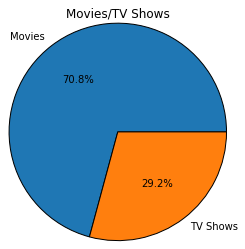

In [157]:
size=[m_size, t_size]
labels=['Movies','TV Shows']
plt.pie(size,labels=labels,radius= 1.25,wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.title('Movies/TV Shows')

In [158]:
vcmc = nf_clean['main_country'].value_counts()
dfvcmc = pd.DataFrame(vcmc)
dfvcmc = dfvcmc.reset_index()
dfvcmc.columns = ['country', 'counts']

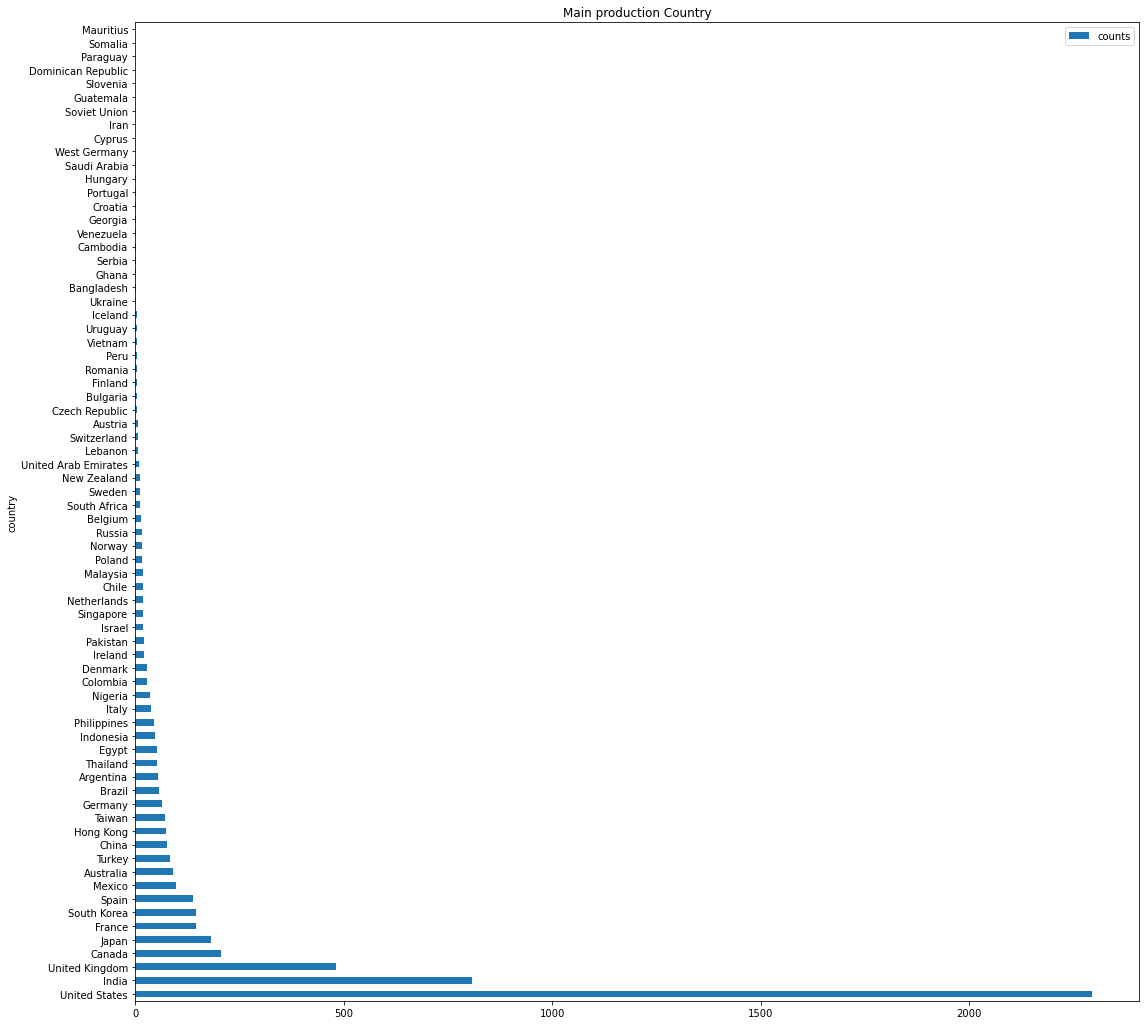

In [159]:
dfvcmc.plot.barh(x='country',y='counts',figsize=(18,18), title='Main production Country')

In [160]:
vcry = nf_clean['release_year'].value_counts()
dfvcry = pd.DataFrame(vcry)
dfvcry = dfvcry.reset_index()
dfvcry.columns = ['release_year', 'counts']

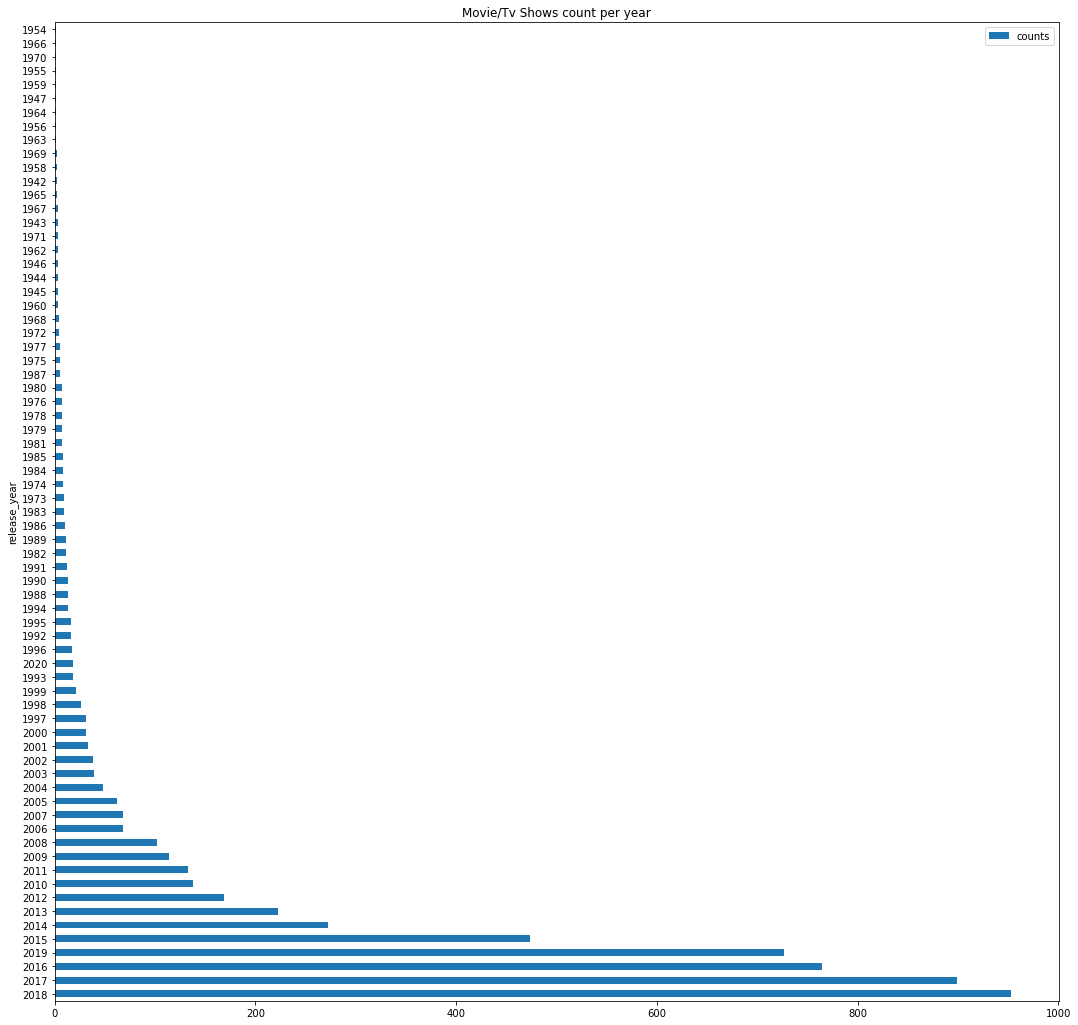

In [161]:
dfvcry.plot.barh(x='release_year',y='counts',figsize=(18,18),title= 'Movie/Tv Shows count per year')

In [162]:
vcr = nf_clean['rating'].value_counts()
dfvcr = pd.DataFrame(vcr)
dfvcr = dfvcr.reset_index()
dfvcr.columns = ['rating', 'counts']

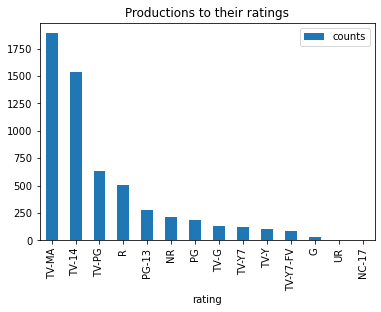

In [163]:
dfvcr.plot.bar(x='rating',y='counts',title='Productions to their ratings')

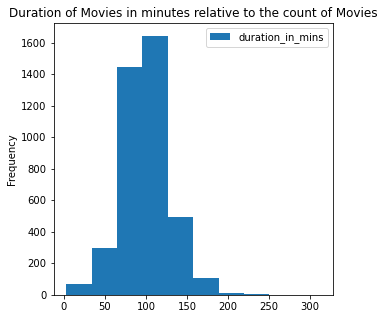

In [164]:
movies.plot.hist( y='duration_in_mins',figsize=(5,5),title='Duration of Movies in minutes relative to the count of Movies')

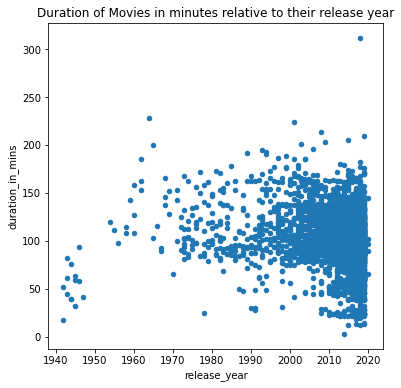

In [165]:
movies.plot.scatter(x='release_year', y='duration_in_mins',figsize=(6,6),title='Duration of Movies in minutes relative to their release year')

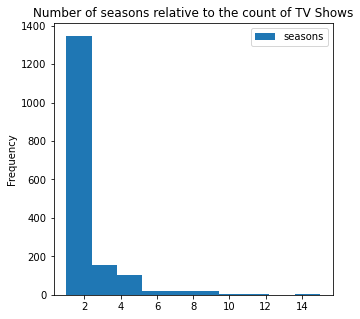

In [166]:
tv_shows.plot.hist( y='seasons',figsize=(5,5), title='Number of seasons relative to the count of TV Shows')

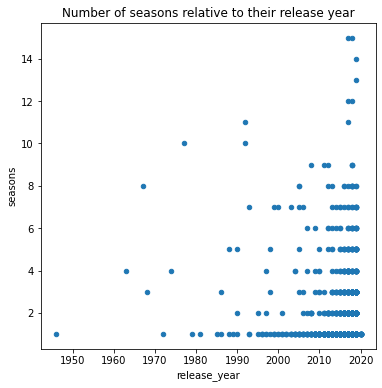

In [167]:
tv_shows.plot.scatter(x='release_year', y='seasons',figsize=(6,6),title='Number of seasons relative to their release year')